In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('batch_corrected_tpm.tsv', sep='\t', index_col=False)
df

/var/folders/4g/z3rj5j_j781_8ckvkcy7p4840000gp/T/ipykernel_3049/660463230.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('batch_corrected_tpm.tsv', sep='\t', index_col=False)


,rsem.out.D01_MDDC_Ctrl_0h,rsem.out.D01_MDDC_Ctrl_120h,rsem.out.D01_MDDC_Lps_12h,rsem.out.D01_MDDC_Lps_1h,rsem.out.D01_MDDC_Lps_24h,rsem.out.D01_MDDC_Lps_2h,rsem.out.D01_MDDC_Lps_4h,rsem.out.D01_MDDC_Lps_6h,rsem.out.D09_MDDC_Ctrl_0h,rsem.out.D09_MDDC_Ctrl_120h,...,rsem.out.F33_MDDC_Lps_1h,rsem.out.F33_MDDC_Lps_24h,rsem.out.F33_MDDC_Lps_2h,rsem.out.F33_MDDC_Lps_30m,rsem.out.F33_MDDC_Lps_4h,rsem.out.F33_MDDC_Lps_6h,rsem.out.G40_MDDC_Lps_2h,rsem.out.G40_MDDC_Lps_6h,rsem.out.G41_MDDC_Lps_2h,rsem.out.G41_MDDC_Lps_6h
0,RPS11,2966.003181,2527.217203,2232.529003,2781.490688,1629.466099,2818.612413,2380.521452,2465.919133,2710.162233,...,1907.045088,2975.042984,1878.622185,2693.793328,2923.381798,2203.596572,2096.296081,2832.544701,1987.454305,2474.734283
1,ELMO2,24.944727,26.241479,45.047532,20.347192,33.263392,18.344631,31.999284,44.436236,24.502283,...,35.800218,23.163764,31.301492,16.788901,24.070872,34.901587,49.222670,24.843361,33.454842,21.330241
2,PNMA1,22.911707,22.911707,21.881046,21.881046,41.122517,21.881046,21.881046,27.010681,21.057745,...,34.162384,21.636211,36.420088,18.179567,25.073311,20.486331,21.636211,20.666177,28.983175,22.456111
3,MMP2,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,2.480635,...,0.931542,2.018865,0.931542,0.931542,0.931542,0.931542,2.018865,2.555164,1.632957,2.003892
4,TRAF3IP2-AS1,2.889639,1.583910,1.583910,2.889639,1.583910,1.583910,2.889639,2.889639,1.652200,...,1.627323,1.627323,1.627323,2.942854,1.627323,4.258908,2.942854,2.356925,3.393431,3.395857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,PCIF1,19.313654,19.313654,20.733990,14.990989,28.402056,12.788201,10.550735,17.164767,19.900583,...,22.615331,16.108115,24.789572,10.708126,19.358573,11.786081,16.108115,12.606197,21.777373,16.560121
10045,PIK3IP1,8.416499,6.804120,2.418235,5.125868,1.429923,4.254408,0.355897,1.429923,9.827003,...,1.865377,3.862856,4.873248,0.883002,8.967542,2.859646,1.865377,2.178233,5.949715,2.339124
10046,SNRPD2,96.862861,79.704790,65.813845,82.004761,79.704790,79.704790,44.615771,65.813845,97.180902,...,70.223800,67.981267,78.123978,84.955390,84.955390,64.630326,60.187407,74.418169,67.742037,52.001339
10047,SLC39A6,63.113874,67.075910,58.240562,56.584399,107.865091,59.062463,58.240562,49.778744,63.885608,...,62.391869,66.419768,69.119406,66.419768,70.473403,55.739436,50.476137,51.432619,74.394764,61.052326


In [3]:
df.columns

Index(['rsem.out.D01_MDDC_Ctrl_0h', 'rsem.out.D01_MDDC_Ctrl_120h',
       'rsem.out.D01_MDDC_Lps_12h', 'rsem.out.D01_MDDC_Lps_1h',
       'rsem.out.D01_MDDC_Lps_24h', 'rsem.out.D01_MDDC_Lps_2h',
       'rsem.out.D01_MDDC_Lps_4h', 'rsem.out.D01_MDDC_Lps_6h',
       'rsem.out.D09_MDDC_Ctrl_0h', 'rsem.out.D09_MDDC_Ctrl_120h',
       'rsem.out.D09_MDDC_Lps_12h', 'rsem.out.D09_MDDC_Lps_1h',
       'rsem.out.D09_MDDC_Lps_24h', 'rsem.out.D09_MDDC_Lps_2h',
       'rsem.out.D09_MDDC_Lps_4h', 'rsem.out.D09_MDDC_Lps_6h',
       'rsem.out.D10_MDDC_Ctrl_0h', 'rsem.out.D10_MDDC_Lps_12h',
       'rsem.out.D10_MDDC_Lps_24h', 'rsem.out.D10_MDDC_Lps_2h',
       'rsem.out.D10_MDDC_Lps_4h', 'rsem.out.D10_MDDC_Lps_6h',
       'rsem.out.D12_MDDC_Ctrl_0h', 'rsem.out.D12_MDDC_Lps_12h',
       'rsem.out.D12_MDDC_Lps_1h', 'rsem.out.D12_MDDC_Lps_4h',
       'rsem.out.D13_MDDC_Ctrl_0h', 'rsem.out.D13_MDDC_Lps_12h',
       'rsem.out.D13_MDDC_Lps_1h', 'rsem.out.D13_MDDC_Lps_4h',
       'rsem.out.D14_MDDC_Ctrl_0h', 

In [4]:
df['rsem.out.D13_MDDC_Ctrl_0h']

0        1960.183098
1          19.109066
2          19.266759
3           0.970965
4           2.855052
            ...     
10044       8.786486
10045       1.258453
10046      52.437342
10047      70.774059
10048    2669.059631
Name: rsem.out.D13_MDDC_Ctrl_0h, Length: 10049, dtype: float64

In [5]:
df['gene'] = df['rsem.out.D01_MDDC_Ctrl_0h']
df['rsem.out.D01_MDDC_Ctrl_0h'] = pd.NA

In [6]:
df

,rsem.out.D01_MDDC_Ctrl_0h,rsem.out.D01_MDDC_Ctrl_120h,rsem.out.D01_MDDC_Lps_12h,rsem.out.D01_MDDC_Lps_1h,rsem.out.D01_MDDC_Lps_24h,rsem.out.D01_MDDC_Lps_2h,rsem.out.D01_MDDC_Lps_4h,rsem.out.D01_MDDC_Lps_6h,rsem.out.D09_MDDC_Ctrl_0h,rsem.out.D09_MDDC_Ctrl_120h,...,rsem.out.F33_MDDC_Lps_24h,rsem.out.F33_MDDC_Lps_2h,rsem.out.F33_MDDC_Lps_30m,rsem.out.F33_MDDC_Lps_4h,rsem.out.F33_MDDC_Lps_6h,rsem.out.G40_MDDC_Lps_2h,rsem.out.G40_MDDC_Lps_6h,rsem.out.G41_MDDC_Lps_2h,rsem.out.G41_MDDC_Lps_6h,gene
0,<NA>,2966.003181,2527.217203,2232.529003,2781.490688,1629.466099,2818.612413,2380.521452,2465.919133,2710.162233,...,2975.042984,1878.622185,2693.793328,2923.381798,2203.596572,2096.296081,2832.544701,1987.454305,2474.734283,RPS11
1,<NA>,24.944727,26.241479,45.047532,20.347192,33.263392,18.344631,31.999284,44.436236,24.502283,...,23.163764,31.301492,16.788901,24.070872,34.901587,49.222670,24.843361,33.454842,21.330241,ELMO2
2,<NA>,22.911707,22.911707,21.881046,21.881046,41.122517,21.881046,21.881046,27.010681,21.057745,...,21.636211,36.420088,18.179567,25.073311,20.486331,21.636211,20.666177,28.983175,22.456111,PNMA1
3,<NA>,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,2.480635,...,2.018865,0.931542,0.931542,0.931542,0.931542,2.018865,2.555164,1.632957,2.003892,MMP2
4,<NA>,2.889639,1.583910,1.583910,2.889639,1.583910,1.583910,2.889639,2.889639,1.652200,...,1.627323,1.627323,2.942854,1.627323,4.258908,2.942854,2.356925,3.393431,3.395857,TRAF3IP2-AS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,<NA>,19.313654,19.313654,20.733990,14.990989,28.402056,12.788201,10.550735,17.164767,19.900583,...,16.108115,24.789572,10.708126,19.358573,11.786081,16.108115,12.606197,21.777373,16.560121,PCIF1
10045,<NA>,8.416499,6.804120,2.418235,5.125868,1.429923,4.254408,0.355897,1.429923,9.827003,...,3.862856,4.873248,0.883002,8.967542,2.859646,1.865377,2.178233,5.949715,2.339124,PIK3IP1
10046,<NA>,96.862861,79.704790,65.813845,82.004761,79.704790,79.704790,44.615771,65.813845,97.180902,...,67.981267,78.123978,84.955390,84.955390,64.630326,60.187407,74.418169,67.742037,52.001339,SNRPD2
10047,<NA>,63.113874,67.075910,58.240562,56.584399,107.865091,59.062463,58.240562,49.778744,63.885608,...,66.419768,69.119406,66.419768,70.473403,55.739436,50.476137,51.432619,74.394764,61.052326,SLC39A6


In [7]:
temp_cols = df.columns.tolist()
new_cols = [temp_cols[-1]] + temp_cols[0:-1]
df = df[new_cols]

In [8]:
df

,gene,rsem.out.D01_MDDC_Ctrl_0h,rsem.out.D01_MDDC_Ctrl_120h,rsem.out.D01_MDDC_Lps_12h,rsem.out.D01_MDDC_Lps_1h,rsem.out.D01_MDDC_Lps_24h,rsem.out.D01_MDDC_Lps_2h,rsem.out.D01_MDDC_Lps_4h,rsem.out.D01_MDDC_Lps_6h,rsem.out.D09_MDDC_Ctrl_0h,...,rsem.out.F33_MDDC_Lps_1h,rsem.out.F33_MDDC_Lps_24h,rsem.out.F33_MDDC_Lps_2h,rsem.out.F33_MDDC_Lps_30m,rsem.out.F33_MDDC_Lps_4h,rsem.out.F33_MDDC_Lps_6h,rsem.out.G40_MDDC_Lps_2h,rsem.out.G40_MDDC_Lps_6h,rsem.out.G41_MDDC_Lps_2h,rsem.out.G41_MDDC_Lps_6h
0,RPS11,<NA>,2966.003181,2527.217203,2232.529003,2781.490688,1629.466099,2818.612413,2380.521452,2465.919133,...,1907.045088,2975.042984,1878.622185,2693.793328,2923.381798,2203.596572,2096.296081,2832.544701,1987.454305,2474.734283
1,ELMO2,<NA>,24.944727,26.241479,45.047532,20.347192,33.263392,18.344631,31.999284,44.436236,...,35.800218,23.163764,31.301492,16.788901,24.070872,34.901587,49.222670,24.843361,33.454842,21.330241
2,PNMA1,<NA>,22.911707,22.911707,21.881046,21.881046,41.122517,21.881046,21.881046,27.010681,...,34.162384,21.636211,36.420088,18.179567,25.073311,20.486331,21.636211,20.666177,28.983175,22.456111
3,MMP2,<NA>,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,...,0.931542,2.018865,0.931542,0.931542,0.931542,0.931542,2.018865,2.555164,1.632957,2.003892
4,TRAF3IP2-AS1,<NA>,2.889639,1.583910,1.583910,2.889639,1.583910,1.583910,2.889639,2.889639,...,1.627323,1.627323,1.627323,2.942854,1.627323,4.258908,2.942854,2.356925,3.393431,3.395857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,PCIF1,<NA>,19.313654,19.313654,20.733990,14.990989,28.402056,12.788201,10.550735,17.164767,...,22.615331,16.108115,24.789572,10.708126,19.358573,11.786081,16.108115,12.606197,21.777373,16.560121
10045,PIK3IP1,<NA>,8.416499,6.804120,2.418235,5.125868,1.429923,4.254408,0.355897,1.429923,...,1.865377,3.862856,4.873248,0.883002,8.967542,2.859646,1.865377,2.178233,5.949715,2.339124
10046,SNRPD2,<NA>,96.862861,79.704790,65.813845,82.004761,79.704790,79.704790,44.615771,65.813845,...,70.223800,67.981267,78.123978,84.955390,84.955390,64.630326,60.187407,74.418169,67.742037,52.001339
10047,SLC39A6,<NA>,63.113874,67.075910,58.240562,56.584399,107.865091,59.062463,58.240562,49.778744,...,62.391869,66.419768,69.119406,66.419768,70.473403,55.739436,50.476137,51.432619,74.394764,61.052326


In [9]:
df_elmo = df[df['gene'] == 'ELMO2']
df_elmo

,gene,rsem.out.D01_MDDC_Ctrl_0h,rsem.out.D01_MDDC_Ctrl_120h,rsem.out.D01_MDDC_Lps_12h,rsem.out.D01_MDDC_Lps_1h,rsem.out.D01_MDDC_Lps_24h,rsem.out.D01_MDDC_Lps_2h,rsem.out.D01_MDDC_Lps_4h,rsem.out.D01_MDDC_Lps_6h,rsem.out.D09_MDDC_Ctrl_0h,...,rsem.out.F33_MDDC_Lps_1h,rsem.out.F33_MDDC_Lps_24h,rsem.out.F33_MDDC_Lps_2h,rsem.out.F33_MDDC_Lps_30m,rsem.out.F33_MDDC_Lps_4h,rsem.out.F33_MDDC_Lps_6h,rsem.out.G40_MDDC_Lps_2h,rsem.out.G40_MDDC_Lps_6h,rsem.out.G41_MDDC_Lps_2h,rsem.out.G41_MDDC_Lps_6h
1,ELMO2,<NA>,24.944727,26.241479,45.047532,20.347192,33.263392,18.344631,31.999284,44.436236,...,35.800218,23.163764,31.301492,16.788901,24.070872,34.901587,49.22267,24.843361,33.454842,21.330241


In [10]:
df_d01 = df_elmo.filter(regex='D01')
df_d01.columns

Index(['rsem.out.D01_MDDC_Ctrl_0h', 'rsem.out.D01_MDDC_Ctrl_120h',
       'rsem.out.D01_MDDC_Lps_12h', 'rsem.out.D01_MDDC_Lps_1h',
       'rsem.out.D01_MDDC_Lps_24h', 'rsem.out.D01_MDDC_Lps_2h',
       'rsem.out.D01_MDDC_Lps_4h', 'rsem.out.D01_MDDC_Lps_6h'],
      dtype='object')

In [11]:
df_d01_ctrl = df_d01.filter(regex='Ctrl')
df_d01_lps = df_d01.filter(regex='Lps')

In [12]:
import re
for col in df.columns:    
    res = re.findall('.D[0-9]', col)
    print(res)

[]
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D0']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
['.D1']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [13]:
patients = []
for col in df.columns:    
    res = re.findall('.[A-Z][0-9]+_', col)
    if len(res) == 1:
        #print(res)
        id = res[0][1:-1]
        if id not in patients:
            patients += [id]
print(patients)

['D01', 'D09', 'D10', 'D12', 'D13', 'D14', 'E01', 'E02', 'E81', 'E86', 'E91', 'E94', 'F30', 'F32', 'F33', 'G40', 'G41']


In [14]:
df_d01_lps_1hs = df_d01_lps['rsem.out.D01_MDDC_Lps_1h']

In [15]:
df_d01_lps_1hs

1    45.047532
Name: rsem.out.D01_MDDC_Lps_1h, dtype: float64

In [16]:
df_d01_lps_1hs = df_d01_lps.filter(regex='Lps_1h')
df_d01_lps_2hs = df_d01_lps.filter(regex='Lps_2h')
df_d01_lps_4hs = df_d01_lps.filter(regex='Lps_4h')
df_d01_lps_6hs = df_d01_lps.filter(regex='Lps_6h')
df_d01_lps_12hs = df_d01_lps.filter(regex='Lps_12h')
df_d01_lps_24hs = df_d01_lps.filter(regex='Lps_24h')

In [17]:
# df_d01_lps_1hs = df_d01_lps.filter(regex='1h')
# len(df_d01_lps_1hs)

In [18]:
elmo2_lps = [df_d01_lps_1hs.values[0][0], df_d01_lps_2hs.values[0][0], 
             df_d01_lps_4hs.values[0][0], df_d01_lps_6hs.values[0][0],
             df_d01_lps_12hs.values[0][0], df_d01_lps_24hs.values[0][0]]
elmo2_lps

[45.0475318926981,
 33.2633922151106,
 18.3446311492144,
 31.9992836225793,
 26.2414785358711,
 20.3471922596519]

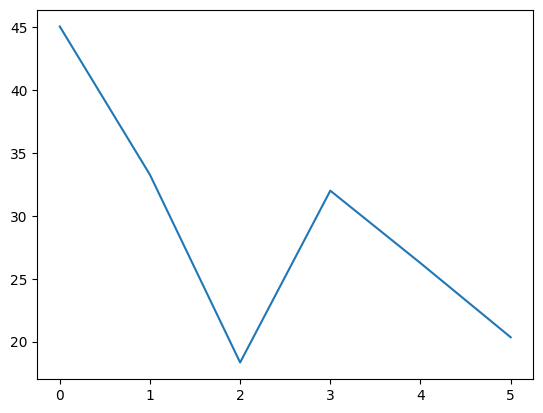

In [19]:
plt.plot(elmo2_lps)

([<matplotlib.axis.XTick at 0x128c42ea0>,
 [Text(0, 0, '1hs'),
  Text(1, 0, '2hs'),
  Text(2, 0, '4hs'),
  Text(3, 0, '6hs'),
  Text(4, 0, '12hs'),
  Text(5, 0, '24hs')])

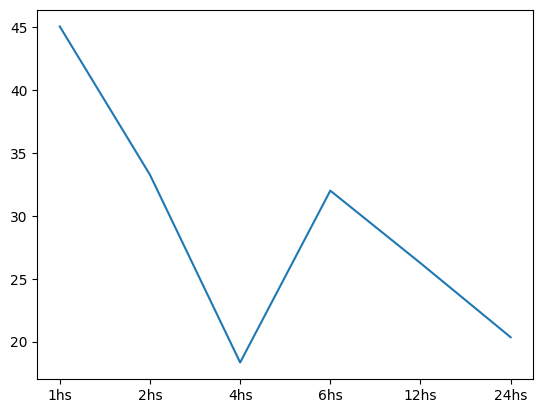

In [20]:
plt.plot(elmo2_lps)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['1hs', '2hs', '4hs', '6hs', '12hs', '24hs'])

([<matplotlib.axis.XTick at 0x128d0a120>,
 [Text(1, 0, '1hs'),
  Text(2, 0, '2hs'),
  Text(4, 0, '4hs'),
  Text(6, 0, '6hs'),
  Text(12, 0, '12hs'),
  Text(24, 0, '24hs')])

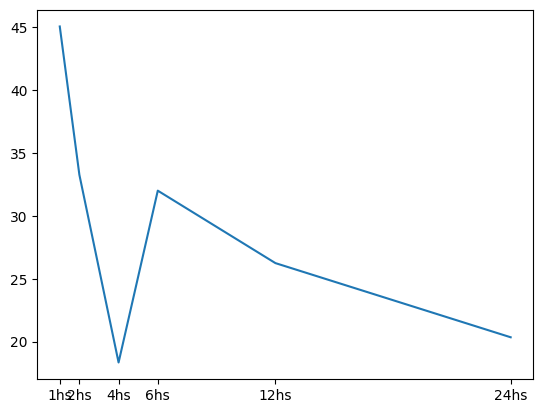

In [21]:
time = [1, 2, 4, 6, 12, 24]
plt.plot(time, elmo2_lps)
plt.xticks(ticks=time, labels=['1hs', '2hs', '4hs', '6hs', '12hs', '24hs'])

In [22]:
def plot_get_lps_data(df, gene_name, pid):
    df_gene = df[df['gene'] == gene_name]
    df_pid = df_gene.filter(regex=pid)

    # Version 1: fails if some of the time points is missing    
    # df_pid_lps_1hs = df_pid.filter(regex='Lps_1h')
    # df_pid_lps_2hs = df_pid.filter(regex='Lps_2h')
    # df_pid_lps_4hs = df_pid.filter(regex='Lps_4h')
    # df_pid_lps_6hs = df_pid.filter(regex='Lps_6h')
    # df_pid_lps_12hs = df_pid.filter(regex='Lps_12h')
    # df_pid_lps_24hs = df_pid.filter(regex='Lps_24h')
    # expr_values = [df_pid_lps_1hs.values[0][0], df_pid_lps_2hs.values[0][0], df_pid_lps_4hs.values[0][0],
    #                df_pid_lps_6hs.values[0][0], df_pid_lps_12hs.values[0][0], df_pid_lps_24hs.values[0][0]]    
    # return expr_values

    time_values = []
    expr_values = []
    # Version 2: fails if some of the time points is missing
    df_pid_lps_1hs = df_pid.filter(regex='Lps_1h')
    if 0 < df_pid_lps_1hs.size:
        expr_values += [df_pid_lps_1hs.values[0][0]]
        time_values += [1]
    # else:
    #     expr_values += [np.nan]
        
    df_pid_lps_2hs = df_pid.filter(regex='Lps_2h')
    if 0 < df_pid_lps_2hs.size:
        expr_values += [df_pid_lps_2hs.values[0][0]]
        time_values += [2]
    # else:
    #     expr_values += [np.nan]
        
    df_pid_lps_4hs = df_pid.filter(regex='Lps_4h')
    if 0 < df_pid_lps_4hs.size:
        expr_values += [df_pid_lps_4hs.values[0][0]]
        time_values += [4]
    # else:
    #     expr_values += [np.nan]
    
    df_pid_lps_6hs = df_pid.filter(regex='Lps_6h')
    if 0 < df_pid_lps_6hs.size:
        expr_values += [df_pid_lps_6hs.values[0][0]]
        time_values += [6]
    # else:
    #     expr_values += [np.nan]
    
    df_pid_lps_12hs = df_pid.filter(regex='Lps_12h')
    if 0 < df_pid_lps_12hs.size:
        expr_values += [df_pid_lps_12hs.values[0][0]]
        time_values += [12]
    # else:
    #     expr_values += [np.nan]
        
    df_pid_lps_24hs = df_pid.filter(regex='Lps_24h')
    if 0 < df_pid_lps_24hs.size:
        expr_values += [df_pid_lps_24hs.values[0][0]]
        time_values += [24]
    # else:
    #     expr_values += [np.nan]


    #return expr_values
    # Version 3 - return dictionary
    return {'time': time_values, 'expression': expr_values}
    


In [23]:
def plot_get_lps_data(df, gene_name, pid):
    df_gene = df[df['gene'] == gene_name]
    df_pid = df_gene.filter(regex=pid)
    hours = [1, 2, 4, 6, 12, 24]
    time_values = []
    expr_values = []
    for h in hours:
        dfh = df_pid.filter(regex=f'Lps_{h:d}h')
        if 0 < dfh.size:
            expr_values += [dfh.values[0][0]]
            time_values += [h]
    return {'time': time_values, 'expression': expr_values}

In [24]:
values = plot_get_lps_data(df, 'ELMO2', 'D01')
values

{'time': [1, 2, 4, 6, 12, 24],
 'expression': [45.0475318926981,
  33.2633922151106,
  18.3446311492144,
  31.9992836225793,
  26.2414785358711,
  20.3471922596519]}

([<matplotlib.axis.XTick at 0x128cb6ab0>,
 [Text(1, 0, '1hs'),
  Text(2, 0, '2hs'),
  Text(4, 0, '4hs'),
  Text(6, 0, '6hs'),
  Text(12, 0, '12hs'),
  Text(24, 0, '24hs')])

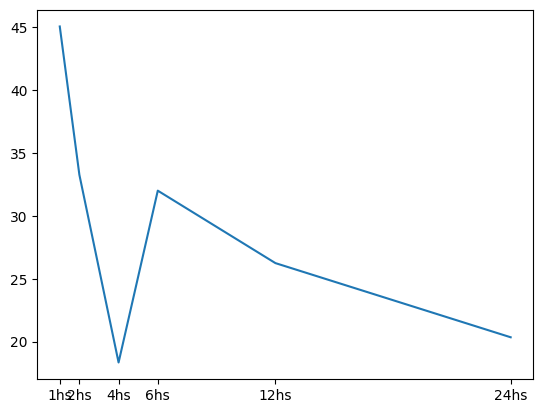

In [25]:
plt.plot(values['time'], values['expression'])
plt.xticks(ticks=[1, 2, 4, 6, 12, 24], labels=['1hs', '2hs', '4hs', '6hs', '12hs', '24hs'])

([<matplotlib.axis.XTick at 0x128dd51c0>,
 [Text(1, 0, '1hs'),
  Text(2, 0, '2hs'),
  Text(4, 0, '4hs'),
  Text(6, 0, '6hs'),
  Text(12, 0, '12hs'),
  Text(24, 0, '24hs')])

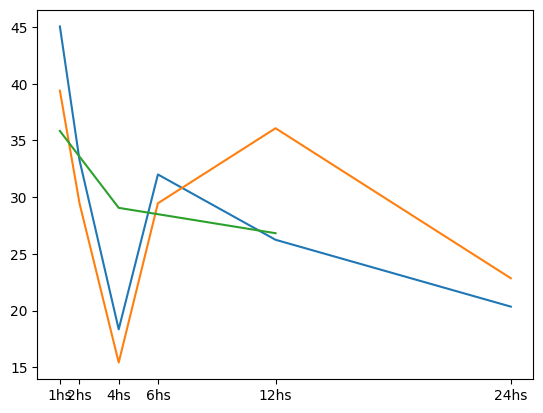

In [26]:
values1 = plot_get_lps_data(df, 'ELMO2', 'D01')
values9 = plot_get_lps_data(df, 'ELMO2', 'D09')
values12 = plot_get_lps_data(df, 'ELMO2', 'D12')

plt.plot(values1['time'], values1['expression'])
plt.plot(values9['time'], values9['expression'])
plt.plot(values12['time'], values12['expression'])

plt.xticks(ticks=time, labels=['1hs', '2hs', '4hs', '6hs', '12hs', '24hs'])

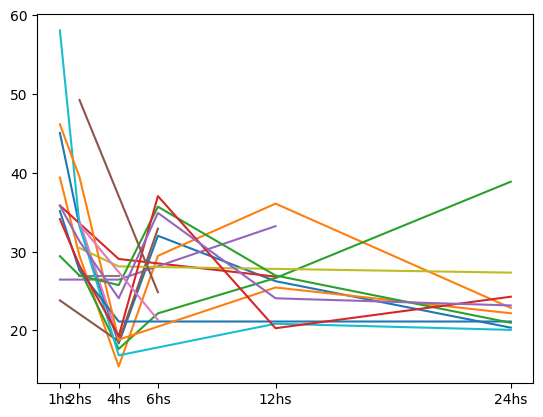

In [27]:
for pid in patients:
    values = plot_get_lps_data(df, 'ELMO2', pid)
    plt.plot(values['time'], values['expression'])
    plt.xticks(ticks=time, labels=['1hs', '2hs', '4hs', '6hs', '12hs', '24hs'])

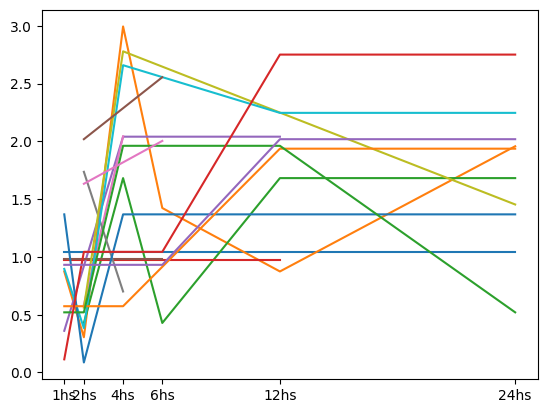

In [28]:
for pid in patients:
    values = plot_get_lps_data(df, 'MMP2', pid)
    plt.plot(values['time'], values['expression'])
    plt.xticks(ticks=time, labels=['1hs', '2hs', '4hs', '6hs', '12hs', '24hs'])

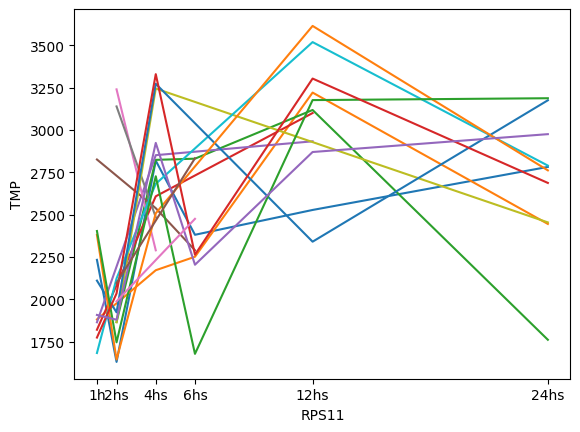

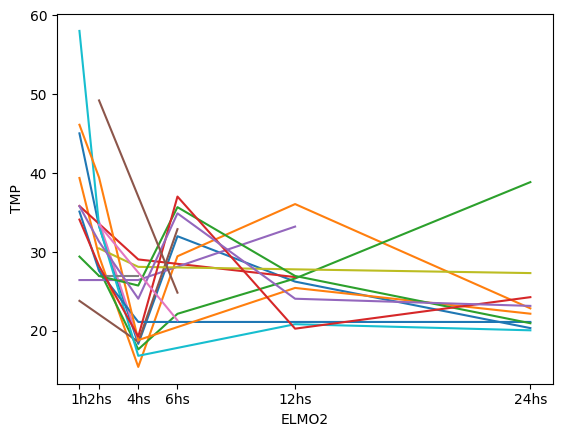

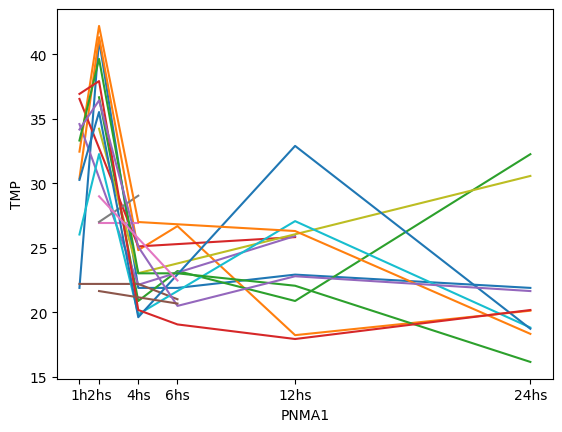

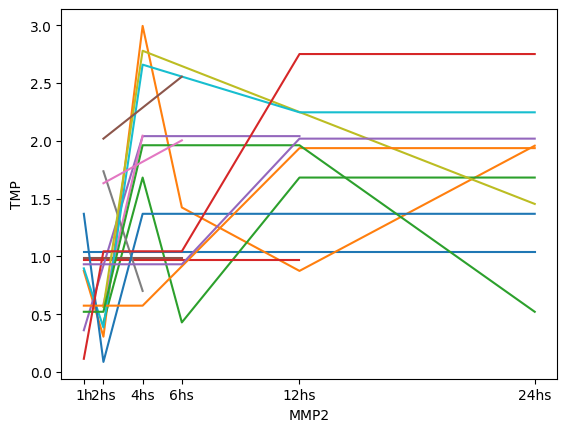

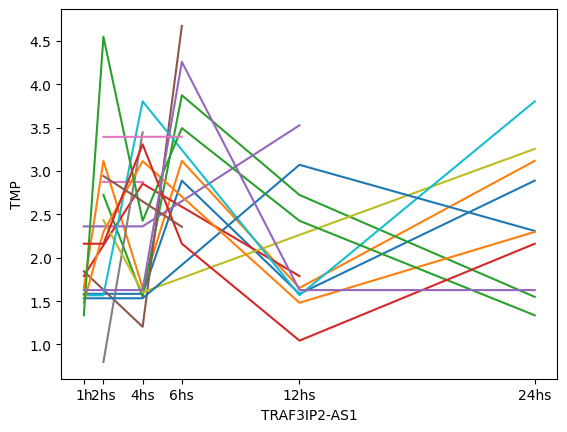

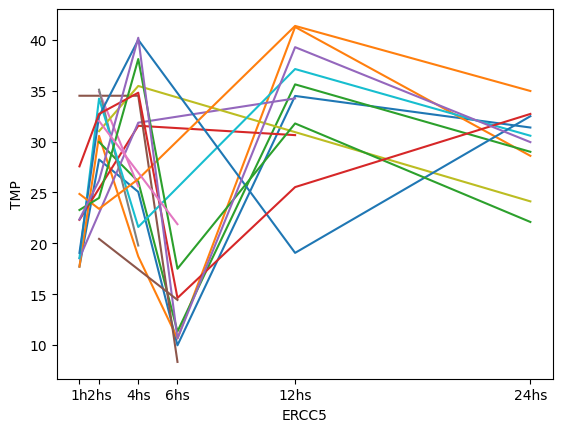

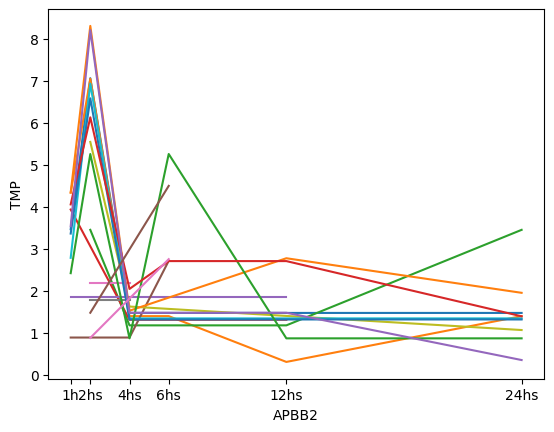

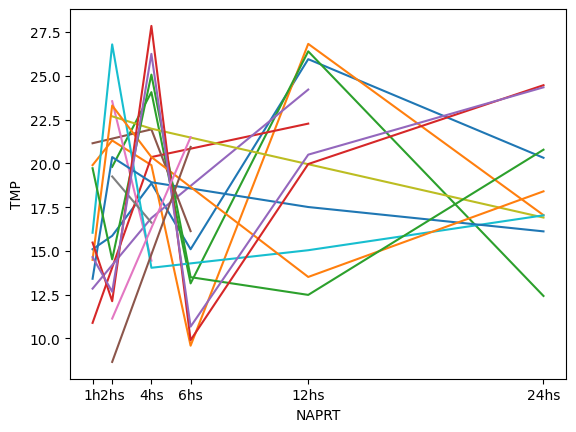

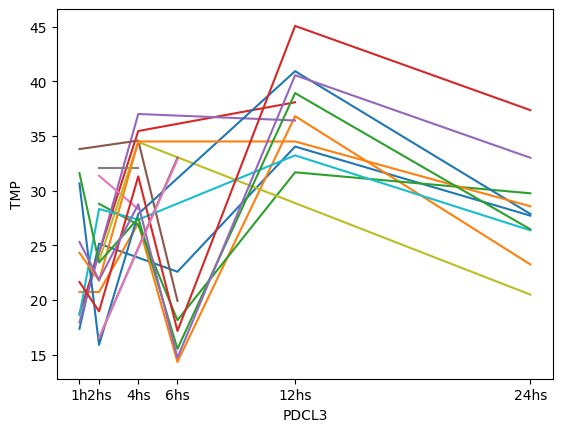

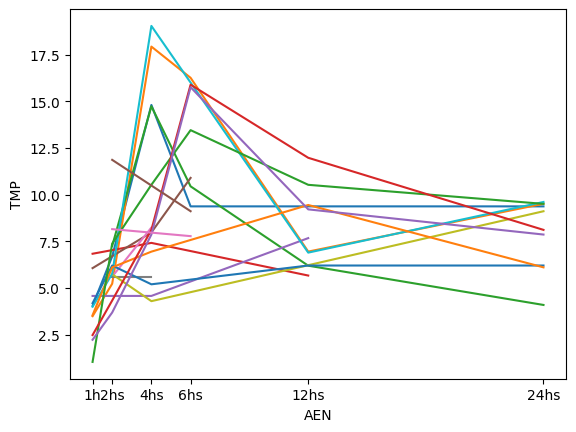

In [33]:
for gene in df['gene'][:10]:
    for pid in patients:
        values = plot_get_lps_data(df, gene, pid)
        plt.plot(values['time'], values['expression'])
    plt.xlabel(gene)
    plt.ylabel('TMP')
    plt.xticks(ticks=time, labels=['1h', '2hs', '4hs', '6hs', '12hs', '24hs'])
    plt.show()

In [61]:
exp_time = {1:[], 2:[], 4:[], 6:[], 12:[], 24:[]}
for pid in patients:
    values = plot_get_lps_data(df, 'ELMO2', pid)
    print(pid, values['time'], values['expression'])    
    for h in exp_time:
        if h in values['time']:
            idx = values['time'].index(h)
            exp_time[h] += [values['expression'][idx]]

D01 [1, 2, 4, 6, 12, 24] [45.0475318926981, 33.2633922151106, 18.3446311492144, 31.9992836225793, 26.2414785358711, 20.3471922596519]
D09 [1, 2, 4, 6, 12, 24] [39.3863577380722, 29.4604600331546, 15.4233303599679, 29.4604600331546, 36.0764690929606, 22.8504034674642]
D10 [2, 4, 6, 12, 24] [27.758244204033, 17.6508722036448, 22.1595841381193, 26.6414089753593, 38.8611786524122]
D12 [1, 4, 12] [35.8360231995542, 29.0562473802603, 26.8206158139744]
D13 [1, 4, 12] [26.4420832142751, 26.4420832142751, 33.2213406445727]
D14 [1, 4, 6] [23.8053766734962, 18.6096706728795, 32.8979285535977]
E01 [2, 4] [33.8412496815201, 18.7839018416354]
E02 [2, 4] [26.9003373887972, 26.9003373887972]
E81 [2, 4, 24] [30.4520608469457, 28.1153512930398, 27.325038383591]
E86 [1, 2, 4, 12, 24] [58.0376319457675, 33.3348918988531, 16.8340971312876, 20.8421934711441, 20.0667689742132]
E91 [1, 2, 4, 12, 24] [35.1262054645235, 27.6062804363668, 21.1267008615459, 21.1267008615459, 21.1267008615459]
E94 [1, 2, 4, 12, 24

{'whiskers': [<matplotlib.lines.Line2D at 0x1295a5310>,
 'caps': [<matplotlib.lines.Line2D at 0x1295a58e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1295a5100>],
 'medians': [<matplotlib.lines.Line2D at 0x1295a5f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1295a61b0>],
 'means': []}

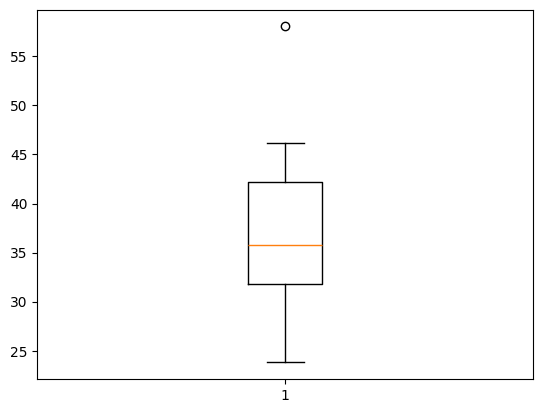

In [62]:
plt.boxplot(exp_time[1])


Text(0.5, 1.0, 'ELMO2')

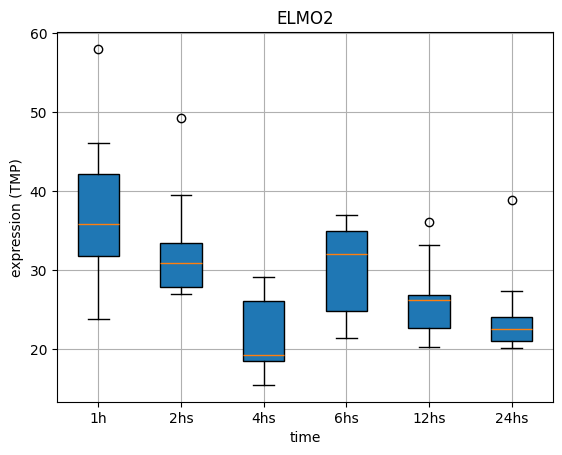

In [88]:
# https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py

plt.boxplot([exp_time[1], exp_time[2], exp_time[4], exp_time[6], exp_time[12], exp_time[24]], vert=True, patch_artist=True)
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['1h', '2hs', '4hs', '6hs', '12hs', '24hs'])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('expression (TMP)')
plt.title('ELMO2')

In [100]:
v = [np.mean(exp_time[1]), np.mean(exp_time[2]), np.mean(exp_time[4]), np.mean(exp_time[6]), np.mean(exp_time[12]), np.mean(exp_time[24])]
hours

[1, 2, 4, 6, 12, 24]

<BarContainer object of 6 artists>

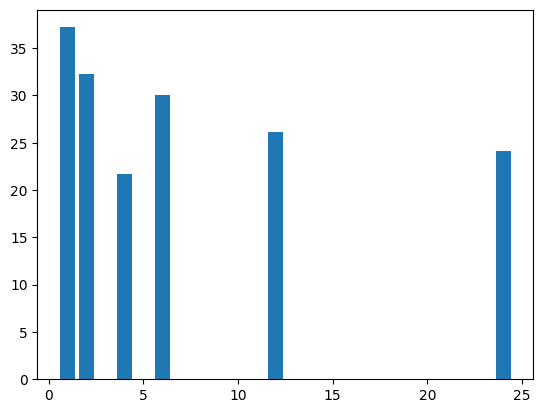

In [105]:
plt.bar(hours, v)

In [ ]:
# Using the axis